In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
#处理矩阵

class no:
    def __init__(self,x,y):                           #定义一个类,x为x轴坐标，y为y轴坐标
        self.x=x
        self.y=y
    
def city_coord(p):                                  #导入矩阵
    coordinate=[[41,94],[37,84],[54,67],[25,62],
               [7,64],[2,99],[68,58],[71,44],[54,62],
               [83,69],[64,60],[18,54],[22,60],
               [83,46],[91,38],[25,38],[24,42],
               [58,69],[71,71],[74,78],[87,76],
               [18,40],[13,40],[82,7],[62,32],
               [58,35],[45,21],[41,26],[44,35],[4,50]]
    for i in coordinate:
        p.append(no(i[0],i[1]))

def getdistance(a,b):                                  #计算两个城市之间距离
    d=np.sqrt(pow(a.x-b.x,2)+pow(a.y-b.y,2))           #输入为类
    return d

def distanceMarix():                                   #生成距离矩阵
    for i in range(n):
        for j in range(n):
            if i==j and dis[i][j]!=0:
                continue
            value=getdistance(p[i],p[j])
            dis[i][j]=value
            dis[j][i]=value


def pathlength(a):                                           #计算路径距离函数，将路径加入
    path_l=0
    for i in range(1,n):
        path_l+=dis[a[i-1]][a[i]]
    path_l+=dis[a[n-1]][a[0]]
    return path_l

def random_route(rand):                                           #产生一个随机路径
    vis=[0]*n                                                   #产生一个标记数组，初始全为0如果已走过变为1
    vis[start]=1                                               #假定从start城市开始
    on=1
    while (on<n):
        random=np.random.randint(0,n)
        if vis[random]==1:            
            continue
        vis[random]=1
        rand[on]=random
        on+=1


def newroute1(rand):                                            #将原来城市中的2个城市进行交换
    a=rand[:]                                                   
    m=np.random.randint(0,n)
    q=m
    while q==m:
        q=np.random.randint(0,n)
    a[q],a[m]=a[m],a[q]                                       #交换元素
    return a

def newroute2(rand):                                           #将原来城市中2个随机城市之间的城市逆序排列
    a=rand[:]
    m=np.random.randint(0,n)
    q=m
    while q==m:
        q=np.random.randint(0,n)
    if m>n:
        m,q=q,m
    res=a[m:n+1]
    res.reverse()
    a[m:n+1]=res
    return a

def newroute3(rand):                                            #将原来城市序列中一个城市弹出，插入到另一个位置上
    a=rand[:]
    m=np.random.randint(0,n)
    t=a[m]
    a.pop(m)
    q=m
    while q==m:
        q=np.random.randint(0,n)
    a.insert(q,t)
    return a

def print_path(a):                                                  #打印路径，路径长度
    path=''
    for i in range(n):
        path+=str(a[i])
        path+='->'
    path+=str(a[0])
    print("最短路径为",path)
    print("最短路径长度为",pathlength(a))
def show():                                                          #可视化 
    fig=plt.figure(num=1,figsize=(10,10))
    x=[]
    y=[]
    for i in old_path:
        x.append(p[i].x)
        y.append(p[i].y)
    x.append(p[old_path[0]].x)
    y.append(p[old_path[0]].y)
    plt.plot(x,y,color='r',marker='*');
    plt.show()
    
    
    fig=plt.figure(num=2,figsize=(10,10))
    a=[i for i in range(len(record))]
    b=record[:]
    plt.xlabel("迭代次数",fontproperties='SimSun')
    plt.ylabel("路径长度",fontproperties='SimSun')
    plt.title("降温进化曲线",fontproperties='SimSun')
    plt.plot(a,b,'-')
    plt.show()
    
    fig=plt.figure(num=2,figsize=(10,10))
    a=[i for i in range(len(record1))]
    b=record1[:]
    plt.xlabel("迭代次数",fontproperties='SimSun')
    plt.ylabel("路径长度",fontproperties='SimSun')
    plt.title("降温进化曲线",fontproperties='SimSun')
    plt.plot(a,b,'-')
    plt.show()

最短路径为 14->13->7->6->10->9->20->19->18->17->8->2->1->0->5->4->3->12->11->29->22->21->16->15->28->27->26->25->24->23->14
最短路径长度为 423.7405631332029


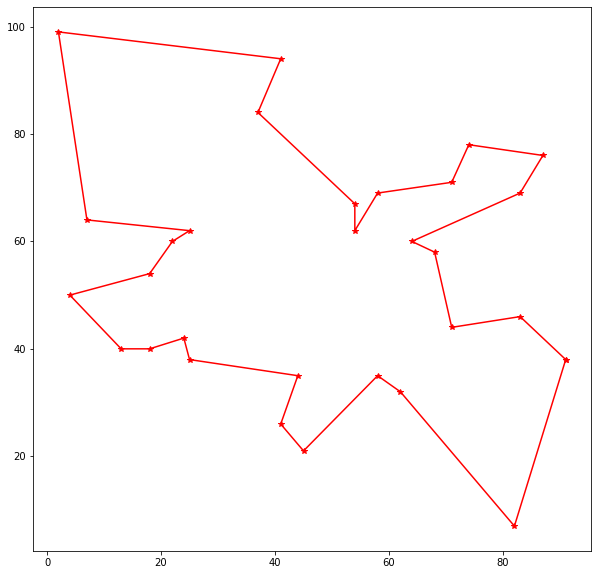

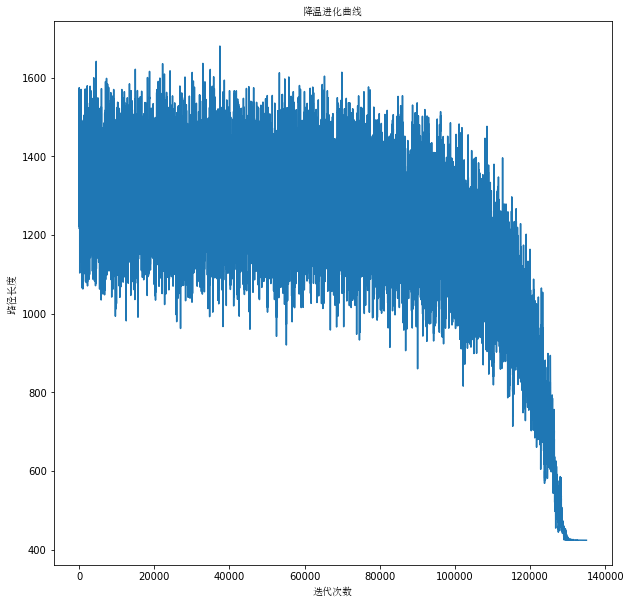

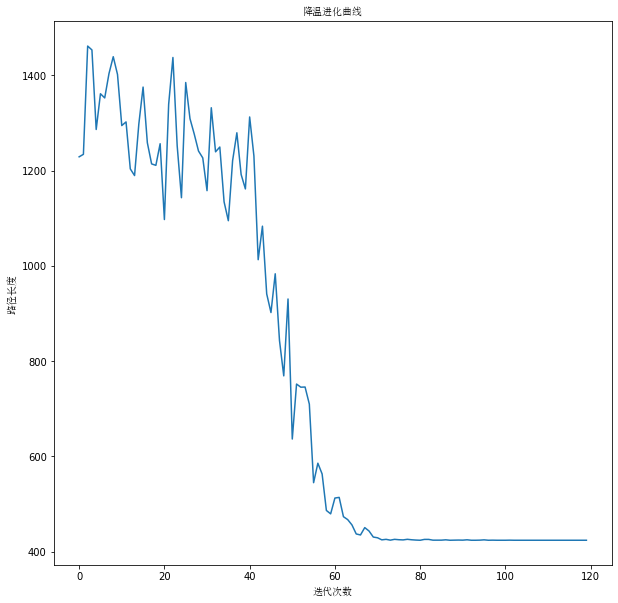

time:: 8.413066625595093


In [4]:
p=[]
city_coord(p)
n=30
t0=100*n                                            #初始温度
tf=0.01                                                 #截止温度
alpha=0.9                                     #退温系数
L=100*n                                                #马尔可夫链长度
T=t0                                                   #31个城市的坐标
dis=[[0]*n for i in range(n)]                          #生成一个20*20的0矩阵
distanceMarix()
start=1
old_path=[start]*n
random_route(old_path)
new_path=[start]*n
best_path=old_path[:]
prebest_path=old_path[:]
P=0
valuelist=[]
record=[]
record1=[]
start_path=[start]*n

s_t= time()
while (T>tf):           
    T=alpha*T
    for i in range(L):
        ran=np.random.randint(1,4)                                                   #随机生成1-3之间的整数
        if ran==1:                                                                   #通过不同方法生成新路径
            new_path=newroute1(old_path)
        elif ran==2:
            new_path=newroute2(old_path)
        else:
            new_path=newroute3(old_path)
        if pathlength(new_path)<pathlength(old_path):                                #如果新路径长度比旧路径短接受
            old_path=new_path[:]
            record.append(pathlength(old_path))
        else:
            if np.exp(-(pathlength(new_path)-pathlength(old_path))/T)>np.random.rand():
                old_path=new_path[:]
                record.append(pathlength(old_path))
    record1.append(pathlength(old_path))
print_path(old_path)
show()
e_t= time()
print("time::",e_t - s_t)
 